This exmaple starts with classification of dogs and cats

In [2]:
#downlaoding the pets dataset
from fastai.vision.all import *
path = untar_data(URLs.PETS)

Data is usually provided in
one of these two ways:


• Individual files representing items of data, such as text documents or images,
possibly organized into folders or with filenames representing information about
those items


• A table of data (e.g., in CSV format) in which each row is an item and may
include filenames providing connections between the data in the table and data
in other formats, such as text documents and images

In [3]:
#lets check the data struture given in the following example
path.ls()

(#2) [Path('/home/manas/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images')]

In [4]:
#going further down the chain
(path/"images").ls(),(path/"annotations").ls()

((#7393) [Path('/home/manas/.fastai/data/oxford-iiit-pet/images/german_shorthaired_151.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/British_Shorthair_21.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/newfoundland_61.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/pomeranian_10.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/beagle_120.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/american_bulldog_20.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/Persian_21.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_5.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/chihuahua_144.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/pomeranian_88.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_138.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/Persian_86.jpg'),Path('/home/manas/.fastai/data/oxford-iiit-pet/images/staffordshire_b

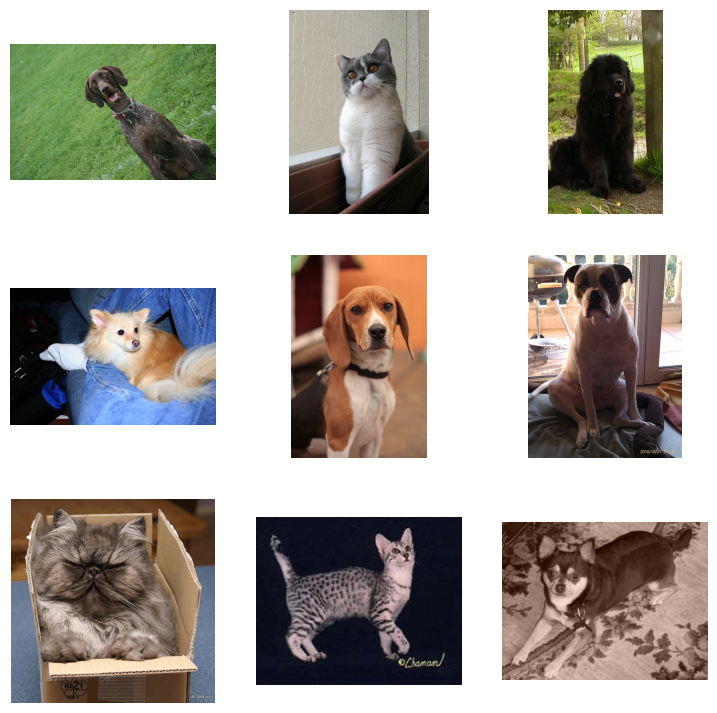

In [5]:
#lets take a look at some of the images
fnames = (path/"images").ls()[:9]
ims = [PILImage.create(f) for f in fnames]
show_images(ims, nrows=3, ncols=3)


Each file‐
name contains the pet breed, then an underscore (_), a number, and finally the file
extension. We need to create a piece of code that extracts the breed from a single
Path.

In [6]:
fname = (path/"images").ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)

['german_shorthaired']

In [7]:
print(f"Lenght of the image dataset {len((path/"images").ls())}")

Lenght of the image dataset 7393


In [8]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(400),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images", bs=4)   

We can never just assume that our code is working perfectly. Writing a DataBlock is
like writing a blueprint. You will get an error message if you have a syntax error
somewhere in your code, but you have no guarantee that your template is going to
work on your data source as you intend. So, before training a model, you should
always check your data.

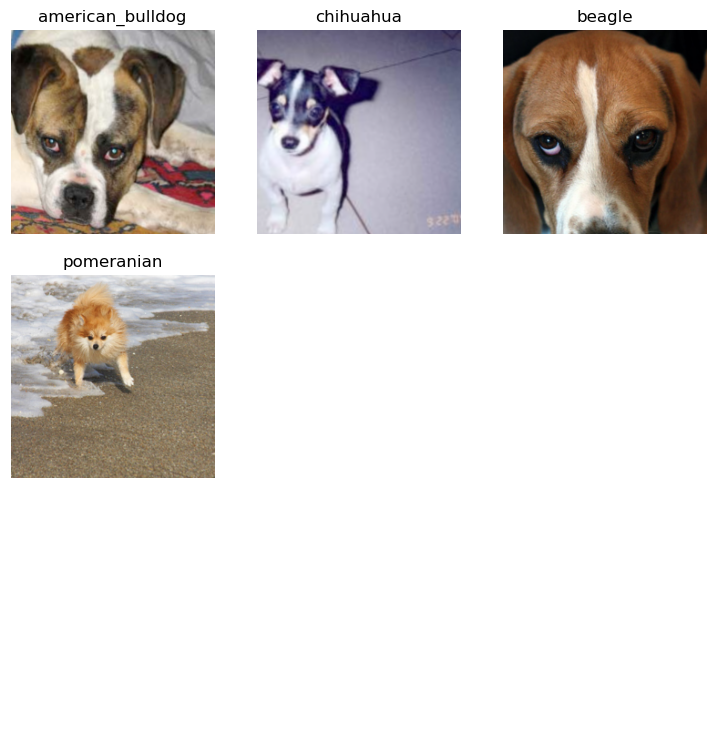

In [9]:
dls.show_batch(nrows=3, ncols=3)


In [10]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      /home/manas/.fastai/data/oxford-iiit-pet/images/american_bulldog_214.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=420x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      /home/manas/.fastai/data/oxford-iiit-pet/images/american_bulldog_214.jpg
    applying partial gives
      american_bulldog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(12)

Final sample: (PILImage mode=RGB size=420x500, TensorCategory(12))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'ad

In [11]:
from fastai.vision.all import *
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "pets_resnet34"      
export_file = model_path/f"{model_name}.pkl"

learn = vision_learner(dls, resnet34, metrics=error_rate, path=model_path)

if (model_path/"models"/f"{model_name}.pth").exists():
    print("Loading existing checkpoint...")
    learn.load(model_name)

learn.fine_tune(
    1,
    cbs=[SaveModelCallback(fname=model_name, every_epoch=True)]
)

learn.export(export_file)


epoch,train_loss,valid_loss,error_rate,time
0,1.545305,0.489998,0.161705,07:03


epoch,train_loss,valid_loss,error_rate,time
0,1.448993,0.489439,0.150880,10:21


Let’s take a look at the activations of our model. To get a batch of real data from our
DataLoaders, we can use the one_batch method:

In [12]:
x,y = dls.one_batch()
y,len(y)

(TensorCategory([23, 34, 21,  2]), 4)

In [13]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([8.8460e-13, 7.6772e-11, 2.6684e-10, 2.9969e-10, 2.9516e-11, 2.6770e-10,
        1.5981e-07, 1.5302e-07, 2.3367e-08, 6.9179e-12, 5.0191e-12, 4.8798e-09,
        1.4124e-07, 2.1157e-10, 5.0112e-09, 8.8800e-09, 2.6085e-08, 4.7698e-09,
        2.5996e-11, 1.4918e-08, 1.2693e-10, 3.3526e-09, 3.8616e-09, 1.0000e+00,
        4.8018e-08, 4.0561e-10, 4.5773e-11, 1.1440e-08, 3.2071e-07, 1.9673e-09,
        1.5779e-07, 6.7023e-10, 2.6590e-12, 6.2688e-11, 8.6138e-10, 5.2042e-13,
        5.2822e-09])

The actual predictions are 37 probabilities between 0 and 1, which add up to 1 in
total:

In [14]:
len(preds[0]),preds[0].sum()

(37, tensor(1.0000))

Now think about what happens if we want to have more categories in our target (such
as our 37 pet breeds). That means we’ll need more activations than just a single col‐
umn: we need an activation per category

In [15]:
acts = torch.randn((6,2))*2
acts

tensor([[ 4.7816,  1.2001],
        [ 1.5939, -1.3720],
        [-1.7222,  1.4059],
        [-0.7162, -1.6623],
        [-0.1767,  1.2671],
        [ 0.6134, -2.2945]])

In [16]:
acts.sigmoid()

tensor([[0.9917, 0.7685],
        [0.8312, 0.2023],
        [0.1516, 0.8031],
        [0.3282, 0.1595],
        [0.4559, 0.7803],
        [0.6487, 0.0916]])

In [17]:
(acts[:,0]-acts[:,1]).sigmoid()
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)

softmax is the multi-category equivalent of sigmoid—we have to use it anytime we
have more than two categories and the probabilities of the categories must add to 1,

In [18]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.9729, 0.0271],
        [0.9510, 0.0490],
        [0.0420, 0.9580],
        [0.7203, 0.2797],
        [0.1910, 0.8090],
        [0.9482, 0.0518]])

The problem is that we are using probabilities, and proba‐
bilities cannot be smaller than 0 or greater than 1. That means our model will not
care whether it predicts 0.99 or 0.999. Indeed, those numbers are very close together
—but in another sense, 0.999 is 10 times more confident than 0.99. So, we want to
transform our numbers between 0 and 1 to instead be between negative infinity and
infinity. There is a mathematical function that does exactly this: the logarithm

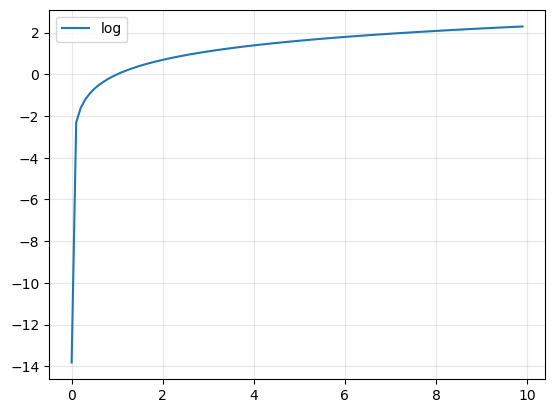

In [ ]:
import torch
import matplotlib.pyplot as plt

def plot_function(fn, min_val=-val2idx5, max_val=5, step=0.1):
    x = torch.arange(min_val, max_val, step)
    y = fn(x.clamp(min=1e-6))  
    plt.plot(x, y, label=fn.__name__ if hasattr(fn, "__name__") else "function")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_function(torch.log, min_val=0, max_val=10)


When we first take the softmax, and then the log likelihood of that, that combination
is called cross-entropy loss. In PyTorch, this is available as nn.CrossEntropyLoss
(which, in practice, does log_softmax and then nll_loss):

In [20]:
import torch
import torch.nn as nn

acts = torch.randn(3, 5, requires_grad=True) 
targ = torch.tensor([1, 0, 4])  

loss_func = nn.CrossEntropyLoss()

loss = loss_func(acts, targ)
print("Loss:", loss.item())


Loss: 1.9719842672348022


In [21]:
from torch import *
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([1.0064, 1.6534, 3.2562], grad_fn=<NllLossBackward0>)

It’s very hard to interpret loss functions directly, because they are designed to be
things computers can differentiate and optimize, not things that people can under‐
stand. That’s why we have metrics. These are not used in the optimization process,
but just to help us poor humans understand what’s going on.

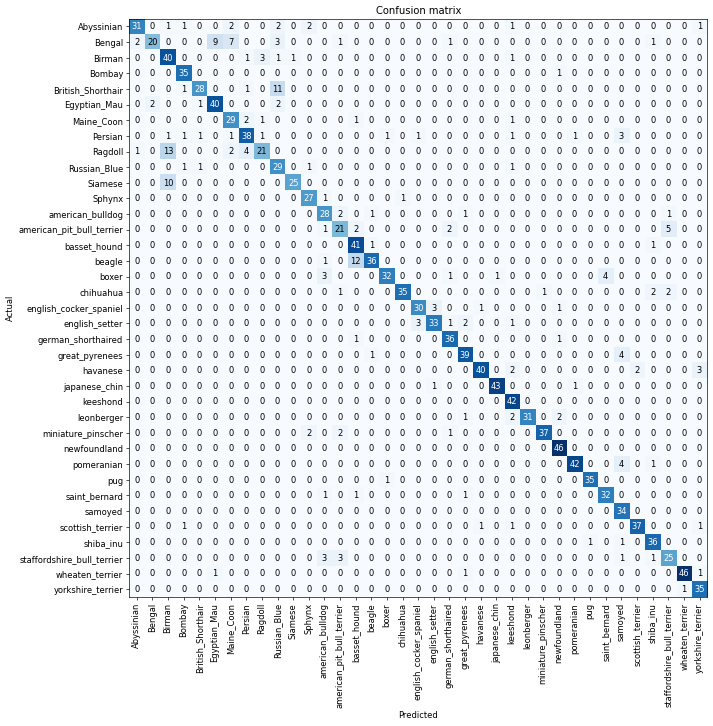

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
#lets check where most of the error happens in 
interp.most_confused(min_val = 5)

[('Ragdoll', 'Birman', np.int64(13)),
 ('beagle', 'basset_hound', np.int64(12)),
 ('British_Shorthair', 'Russian_Blue', np.int64(11)),
 ('Siamese', 'Birman', np.int64(10)),
 ('Bengal', 'Egyptian_Mau', np.int64(9)),
 ('Bengal', 'Maine_Coon', np.int64(7)),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', np.int64(5))]

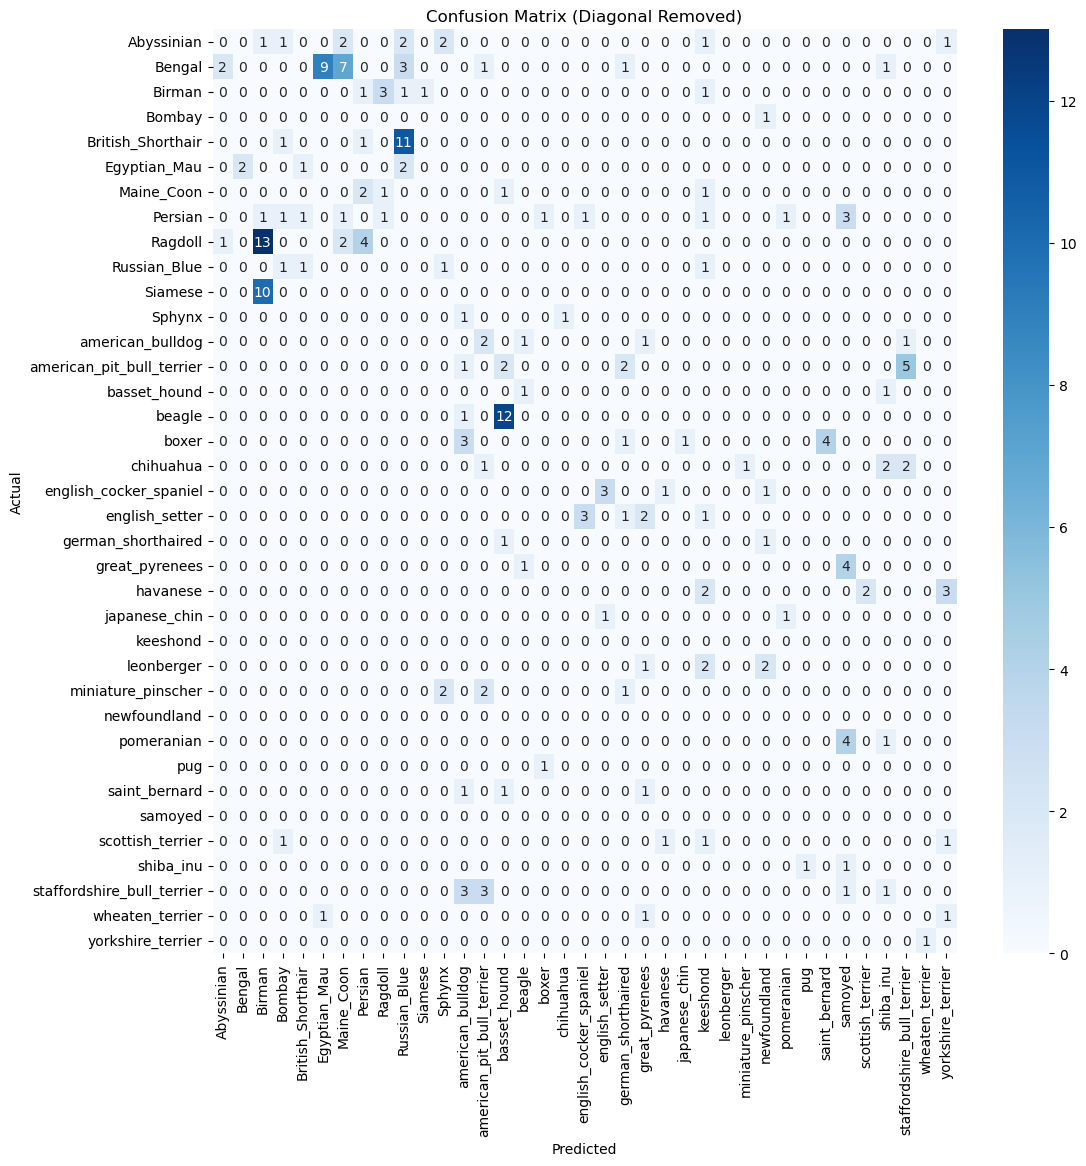

In [ ]:
#Lets make the dialognal elements zero and check for the errors in the matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = interp.confusion_matrix()

cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)

plt.figure(figsize=(12,12))
sns.heatmap(cm_no_diag, annot=True, fmt="d", cmap="Blues",
            xticklabels=interp.vocab, yticklabels=interp.vocab)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Diagonal Removed)")
plt.show()


We will now look at a range of techniques to improve the training of our model and
make it better. While doing so, we will explain a little bit more about transfer learning
and how to fine-tune our pretrained model as best as possible, without breaking the
pretrained weights.


One of the most important things we can do when training a model is to make sure
that we have the right learning rate. If our learning rate is too low, it can take many,
many epochs to train our model. Not only does this waste time, but it also means that
we may have problems with overfitting, because every time we do a complete pass
through the data, we give our model a chance to memorize it.

SuggestedLRs(valley=1.3182567499825382e-06)

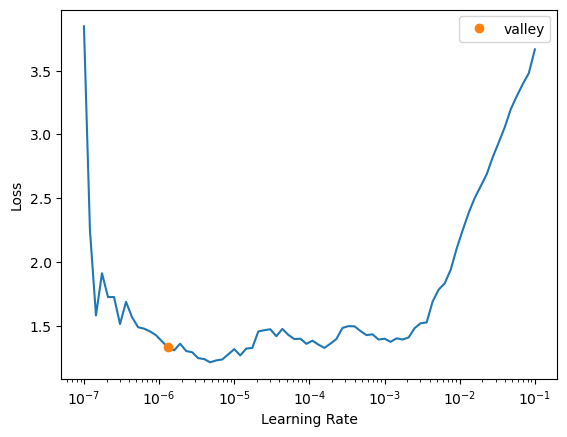

In [24]:
learn.lr_find()


In this learning rate plot, it appears that a learning rate around 3e-3 would be appro‐
priate, so let’s choose that:

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

We wil now just start with transfer learning
in short, what fit_one_cycle does is to start training at a
low learning rate, gradually increase it for the first section of training, and then grad‐
ually decrease it again for the last section of training

When we create a model from a pretrained network, fastai automatically freezes all of
the pretrained layers for us. When we call the fine_tune method, fastai does two
things:


• Trains the randomly added layers for one epoch, with all other layers frozen


• Unfreezes all the layers, and trains them for the number of epochs requested

In [27]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

/usr/lib/python3.13/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,2.598290,1.087350,0.320027,06:37
1,1.703669,0.664697,0.224628,06:40
2,1.561246,0.497201,0.163058,07:15


In [28]:
#Then we’ll unfreeze the model:
learn.unfreeze

<bound method Learner.unfreeze of <fastai.learner.Learner object at 0x7ff88449ead0>>

run lr_find again, because having more layers to train, and weights that have
already been trained for three epochs, means our previously found learning rate isn’t
appropriate anymore:

SuggestedLRs(valley=0.002511886414140463)

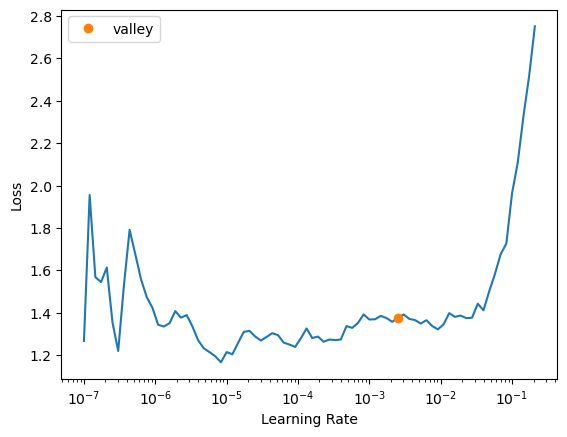

In [29]:
learn.lr_find()

In [31]:
#now lets train it on suitable learning rate
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.238405,0.435404,0.144114,06:57
1,1.280794,0.441226,0.142084,07:08
2,1.431866,0.444869,0.154263,06:42
3,1.264891,0.441214,0.146143,06:25
4,1.330865,0.440315,0.146820,06:24
5,1.204166,0.467413,0.159675,06:24


This has improved our model a bit, but there’s more we can do. The deepest layers of
our pretrained model might not need as high a learning rate as the last ones, so we
should probably use different learning rates for those—this is known as using dis
criminative learning rates.

Even after we unfreeze, we still care a lot about the quality of those pretrained
weights. We would not expect that the best learning rate for those pretrained parame‐
ters would be as high as for the randomly added parameters, even after we have tuned
those randomly added parameters for a few epochs. Remember, the pretrained
weights have been trained for hundreds of epochs, on millions of images.

Like many good ideas in deep learning, it is
extremely simple: use a lower learning rate for the early layers of the neural network,
and a higher learning rate for the later layers (and especially the randomly added lay‐
ers). The idea is based on insights developed by Jason Yosinski et al.,

fastai lets you pass a Python slice object anywhere that a learning rate is expected.
The first value passed will be the learning rate in the earliest layer of the neural net‐
work, and the second value will be the learning rate in the final layer. The layers in
between will have learning rates that are multiplicatively equidistant throughout that
range. Let’s use this approach to replicate the previous training, but this time we’ll set
only the lowest layer of our net to a learning rate of 1e-6; the other layers will scale up
to 1e-4.

In [32]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.525777,1.148740,0.334235,06:47
1,1.737069,0.643669,0.207037,06:53
2,1.428946,0.477337,0.154939,07:02


epoch,train_loss,valid_loss,error_rate,time
0,1.452277,0.481241,0.160352,10:23
1,1.182164,0.447474,0.148173,10:51
2,1.265540,0.476427,0.154263,10:50
3,1.046949,0.392510,0.135318,10:11
4,1.007350,0.396016,0.125169,10:13
5,0.937220,0.388904,0.129229,10:16
6,0.931080,0.337620,0.112991,10:12
7,0.897942,0.356255,0.112991,10:14
8,0.785337,0.350948,0.120433,10:15
9,0.809292,0.327154,0.099459,10:15


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

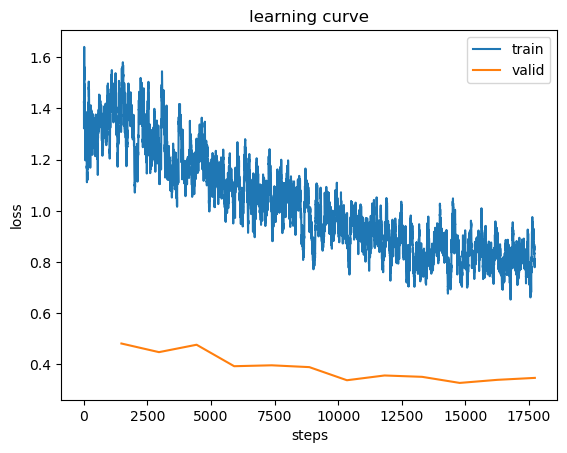

In [33]:
learn.recorder.plot_loss()

In general, a bigger model has the ability to better capture the real underlying rela‐
tionships in your data, as well as to capture and memorize the specific details of your
individual images.
Improving Our Model. However, using a deeper model is going to require more GPU RAM, so you may need
to lower the size of your batches to avoid an out-of-memory error. This happens when
you try to fit too much inside your GPU and looks like this:

Cuda runtime error: out of memory

You may have to restart your notebook when this happens. The way to solve it is to
use a smaller batch size, which means passing smaller groups of images at any given
time through your model. You can pass the batch size you want to the call by creating
your DataLoaders with bs=.

The other downside of deeper architectures is that they take quite a bit longer to
train. One technique that can speed things up a lot is mixed-precision training. This
refers to using less-precise numbers (half-precision floating point, also called fp16)
where possible during training.

nearly all
current NVIDIA GPUs support a special feature called tensor cores that can dramati‐
cally speed up neural network training, by 2–3×. They also require a lot less GPU
memory. To enable this feature in fastai, just add to_fp16() after your Learner cre‐
ation (you also need to import the module).

from fastai2.callback.fp16 import *


learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()


learn.fine_tune(6, freeze_epochs=3)

In [36]:
learn.eval()


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [40]:
loss, acc = learn.validate()
print(f"Validation Loss: {loss:.4f}, Accuracy: {(1-acc)*100:.4f}")


Validation Loss: 0.3468, Accuracy: 88.7009
